<a href="https://colab.research.google.com/github/Pavan202020/AI-ML-Learning-Lab/blob/main/Kmeans_Assignments_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Find Cluster with the data points given

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
points = np.array([(3,-4), (2,3), (-5,-2), (-3,-3), (3,7),
(5,-2), (4,5), (-2,-1), (3,4), (1,5),
(-1,-3), (4,-2), (4,-3)])

In [5]:
df=pd.DataFrame(points,columns=['x','y'])
display(df)


,x,y
0,3,-4
1,2,3
2,-5,-2
3,-3,-3
4,3,7
5,5,-2
6,4,5
7,-2,-1
8,3,4
9,1,5


## Scatter Plot to see the data spread

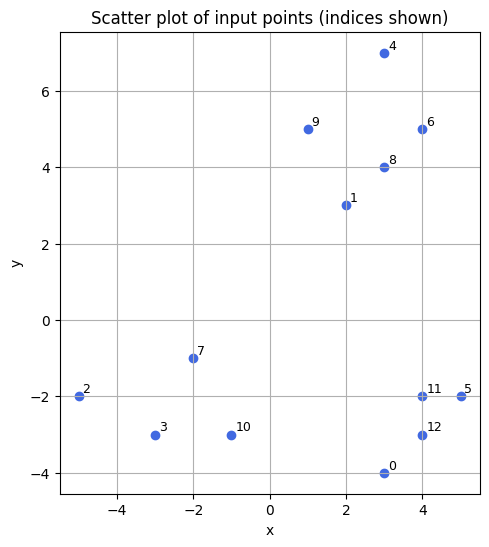

In [6]:
plt.figure(figsize=(6,6))
plt.scatter(df['x'], df['y'], color='royalblue')
for i, (x,y) in enumerate(points):
    plt.text(x+0.1, y+0.1, str(i), fontsize=9)
plt.title("Scatter plot of input points (indices shown)")
plt.xlabel("x"); plt.ylabel("y")
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

### Elbow and Silhouette method

In [7]:
max_k = 6
inertias = []
sil_scores = []

for k in range(1, max_k+1):
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    km.fit(points)
    inertias.append(km.inertia_)
    if k > 1:
        sil = silhouette_score(points, km.labels_)
        sil_scores.append(sil)
    else:
        sil_scores.append(np.nan)

### Elbow Plot

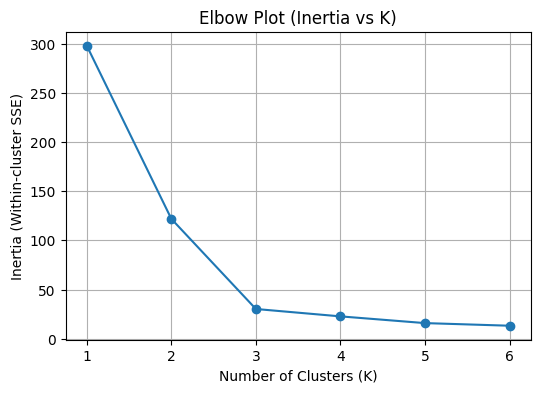

In [8]:
# Elbow Plot
plt.figure(figsize=(6,4))
plt.plot(range(1, max_k+1), inertias, marker='o')
plt.xticks(range(1, max_k+1))
plt.title("Elbow Plot (Inertia vs K)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-cluster SSE)")
plt.grid(True)
plt.show()

## Silhouette Plot

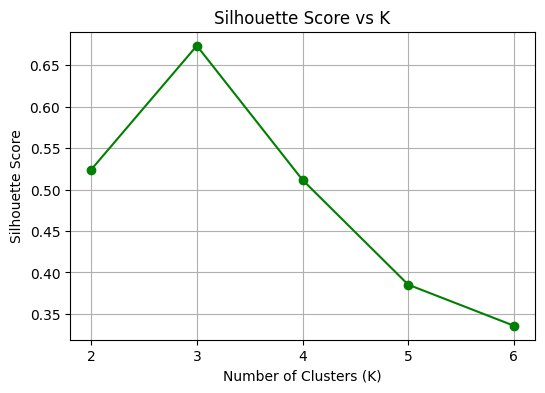

In [9]:
# Silhouette Plot
plt.figure(figsize=(6,4))
plt.plot(range(2, max_k+1), sil_scores[1:], marker='o', color='green')
plt.xticks(range(2, max_k+1))
plt.title("Silhouette Score vs K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

###  Fit final model with K=3 (optimal from elbow/silhouette)

In [10]:
chosen_k = 3
kmeans_final = KMeans(n_clusters=chosen_k, n_init=20, random_state=42)
labels = kmeans_final.fit_predict(points)
centroids = kmeans_final.cluster_centers_

### Plot Final Scores

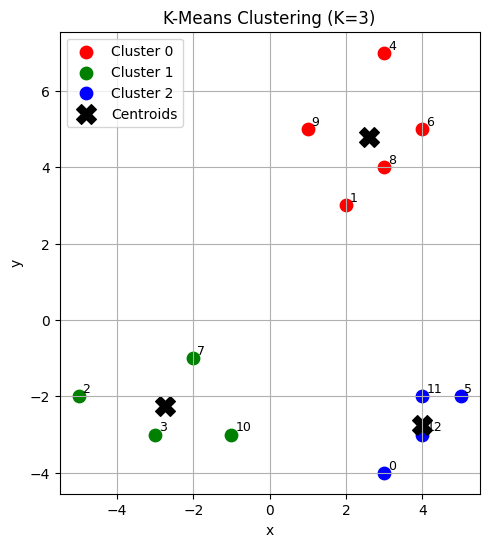

In [11]:
plt.figure(figsize=(6,6))
colors = ['red', 'green', 'blue']
for k in range(chosen_k):
    cluster_points = points[labels == k]
    plt.scatter(cluster_points[:,0], cluster_points[:,1], s=80, color=colors[k], label=f'Cluster {k}')
plt.scatter(centroids[:,0], centroids[:,1], marker='X', s=200, c='black', label='Centroids')
for i, (x,y) in enumerate(points):
    plt.text(x+0.1, y+0.1, str(i), fontsize=9)
plt.title(f"K-Means Clustering (K={chosen_k})")
plt.xlabel("x"); plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

### Final Result

In [13]:
print(f"Recommended K (based on elbow + silhouette): {chosen_k}")
print("\nCluster centroids:\n", centroids)
print("\nPoint assignments (index: point -> cluster):")
for i, p in enumerate(points):
    print(f"{i}: {tuple(p)} -> cluster {labels[i]}")

Recommended K (based on elbow + silhouette): 3

Cluster centroids:
 [[ 2.6   4.8 ]
 [-2.75 -2.25]
 [ 4.   -2.75]]

Point assignments (index: point -> cluster):
0: (np.int64(3), np.int64(-4)) -> cluster 2
1: (np.int64(2), np.int64(3)) -> cluster 0
2: (np.int64(-5), np.int64(-2)) -> cluster 1
3: (np.int64(-3), np.int64(-3)) -> cluster 1
4: (np.int64(3), np.int64(7)) -> cluster 0
5: (np.int64(5), np.int64(-2)) -> cluster 2
6: (np.int64(4), np.int64(5)) -> cluster 0
7: (np.int64(-2), np.int64(-1)) -> cluster 1
8: (np.int64(3), np.int64(4)) -> cluster 0
9: (np.int64(1), np.int64(5)) -> cluster 0
10: (np.int64(-1), np.int64(-3)) -> cluster 1
11: (np.int64(4), np.int64(-2)) -> cluster 2
12: (np.int64(4), np.int64(-3)) -> cluster 2
